In [4]:
from transformers import AutoTokenizer
# Initialize the tokenizer with legacy=False
tokenizer = AutoTokenizer.from_pretrained("unsloth/Llama-3.2-3B", legacy=False)

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def length_function(text: str) -> int:
    return len(tokenizer(text)['input_ids'])

In [11]:
def splitter_vlegth(text: str,name: str):
	sizes_legth = [16,32,64,128,256,512,1024]
	for size in sizes_legth:
		splitter = RecursiveCharacterTextSplitter(
    		chunk_size=size, 
    		chunk_overlap=int(size/5),
    		length_function=length_function,
		)

		splits = splitter.split_text(text)

		for i, split in enumerate(tqdm(splits)):
			indice = text.find(split)
			try:
				conn.execute("""
        			INSERT INTO dataset (content, indice,name)
        			VALUES (?, ?, ?)
        		""", (split, indice,name))
			except Exception as e:
				print(f"Erro ao inserir dados no DuckDB: {e}")

In [7]:
import html2text
from cleantext import clean

# Configurar o conversor
converter = html2text.HTML2Text()
converter.ignore_links = True
converter.ignore_images = True
converter.ignore_tables = True

def cleartext(decoded_html):
	texto_limpo = converter.handle(decoded_html)
	texto_limpo = clean(
		texto_limpo,
		fix_unicode=True,
		to_ascii=False,
		lower=False,
		no_line_breaks=True,
		no_urls=True,
		no_emails=True,
		no_phone_numbers=True,
		no_numbers=False,
		no_digits=False,
		no_currency_symbols=True,
		no_punct=False,  # Defina como True se quiser remover pontuação
		replace_with_punct="",
		replace_with_url="",
		replace_with_email="",
		replace_with_phone_number="",
		replace_with_number="",
		replace_with_digit="",
		replace_with_currency_symbol=""
	)

	return texto_limpo

In [16]:
import duckdb
from tqdm import tqdm

# Conectar ou criar o banco de dados DuckDB
conn = duckdb.connect('train_dataset3.duckdb')

In [9]:
# Criar a tabela de e-mails se não existir
conn.execute("""
CREATE SEQUENCE IF NOT EXISTS serial;
             
CREATE TABLE IF NOT EXISTS dataset (
    id INTEGER DEFAULT nextval('serial'),
    name VARCHAR(255),
    -- type BOOLEAN,
    content TEXT,
    indice INTEGER
)
""")

In [12]:
import os

for f in os.listdir('./books'):
	if os.path.isfile(os.path.join('./books', f)):
		with open(os.path.join('./books', f), 'r', encoding='utf-8') as file:
			print(os.path.join('./books', f))
			splitter_vlegth(cleartext(file.read()),f)

./books/Unknown - ana rosa.txt


100%|██████████| 251/251 [00:00<00:00, 832.00it/s]


./books/Ao Seu Lado - Kasie West.txt


100%|██████████| 292/292 [00:00<00:00, 704.00it/s]


./books/Amor em Roma - Sarah Adams.txt


100%|██████████| 418/418 [00:01<00:00, 303.63it/s]


./books/The Rule Book - Sarah Adams.txt


100%|██████████| 417/417 [00:00<00:00, 815.74it/s]


./books/Marriage for One - Ella Maise.txt


100%|██████████| 600/600 [00:00<00:00, 790.13it/s]


./books/The Worst Best Man - Mia Sosa.txt


100%|██████████| 386/386 [00:03<00:00, 123.65it/s]


./books/Para sempre seu - Abby Jimenez.txt


100%|██████████| 491/491 [00:00<00:00, 848.35it/s]


./books/O efeito Graham - Elle Kennedy.txt


100%|██████████| 675/675 [00:00<00:00, 818.88it/s]


./books/Um feitico de amor - Kate Robb.txt


100%|██████████| 430/430 [00:00<00:00, 772.50it/s]


./books/Mais que Amigos - Lauren Layne.txt


100%|██████████| 279/279 [00:00<00:00, 834.90it/s]


./books/Operacao paixao - Carlie Walker.txt


100%|██████████| 465/465 [00:00<00:00, 699.96it/s]


./books/Os numeros do amor - Helen Hoang.txt


100%|██████████| 400/400 [00:00<00:00, 780.77it/s]


./books/Missao Romance - Lyssa Kay Adams.txt


100%|██████████| 384/384 [00:00<00:00, 732.21it/s]


./books/Dez Dates Surpresa - Ashley Elston.txt


100%|██████████| 341/341 [00:00<00:00, 819.00it/s]


./books/Declinio de um homem - Osamu Dazai.txt


100%|██████████| 147/147 [00:00<00:00, 754.08it/s]


./books/O principio do coracao - Helen Hoang.txt


100%|██████████| 410/410 [00:00<00:00, 784.45it/s]


./books/The Trouble with Love - Lauren Layne.txt


100%|██████████| 278/278 [00:00<00:00, 808.29it/s]


./books/A cancao de Aquiles - Madeline Miller.txt


100%|██████████| 473/473 [00:00<00:00, 816.68it/s]


./books/O Crime do Padre Amaro - Eca de Queiros.txt


100%|██████████| 671/671 [00:06<00:00, 105.47it/s]


./books/Love the One You're With - Lauren Layne.txt


100%|██████████| 310/310 [00:00<00:00, 822.25it/s]


./books/Sozinha ou acompanhada_ - Mazey Eddings.txt


100%|██████████| 418/418 [00:00<00:00, 693.28it/s]


./books/Visoes de Descartes - Olavo de Carvalho.txt


100%|██████████| 285/285 [00:00<00:00, 852.78it/s]


./books/Clube do livro dos homens - Adams, Lyssa Kay.txt


100%|██████████| 380/380 [00:00<00:00, 830.02it/s]


./books/Uma farsa de amor na Espanha_ Conteudo Ext - Armas, Elena.txt


100%|██████████| 37/37 [00:00<00:00, 97.81it/s]


./books/Ed & Lorraine Warren - Lugar Sombrio - Carmen Reed.txt


100%|██████████| 417/417 [00:06<00:00, 65.98it/s]


./books/A longa marcha da vaca para o brejo_ E, lo - de Carvalho, Olavo.txt


100%|██████████| 330/330 [00:00<00:00, 869.67it/s]


./books/D__wwwroot_cleverpdf-web_4707484_Demonolog - Desconhecido.txt


100%|██████████| 440/440 [00:00<00:00, 819.87it/s]


./books/The American Roommate Experiment_ A Novel - Elena Armas.txt


100%|██████████| 489/489 [00:01<00:00, 414.86it/s]


./books/I Think I Love You_ An Exciting New Romanc - Lauren Layne.txt


100%|██████████| 282/282 [00:00<00:00, 301.28it/s]


./books/Just One Night_ Sex, Love & Stiletto Serie - Lauren Layne.txt


100%|██████████| 291/291 [00:00<00:00, 739.74it/s]


./books/Estupidamente apaixonados - Lyssa Kay Adams.txt


100%|██████████| 400/400 [00:07<00:00, 51.52it/s]


./books/Aristoteles em nova perspectiva - Olavo de Carvalho.txt


100%|██████████| 167/167 [00:03<00:00, 47.01it/s]


./books/O imbecil coletivo _ Atualidades incultura - Olavo de Carvalho.txt


100%|██████████| 681/681 [00:06<00:00, 105.75it/s]


./books/O jardim das Aflicoes_ de Epicuro a ressur - Olavo de Carvalho.txt


100%|██████████| 645/645 [00:00<00:00, 770.91it/s]


./books/O minimo que voce precisa saber para nao s - Olavo de Carvalho.txt


100%|██████████| 1083/1083 [00:13<00:00, 82.37it/s] 


./books/Biblia Sagrada Nova Almeida Atualizada - Sociedade Biblica do Brasil.txt


100%|██████████| 3739/3739 [00:09<00:00, 407.35it/s]


In [27]:
tamanho_20 = int(len(splits) * 0.2)
subset_20 = splits[:tamanho_20]

for i, split in enumerate(tqdm(subset_20)):
	indice = content.find(split)
	# Inserir os dados no DuckDB
	try:
		conn.execute("""
        INSERT INTO dataset (content, indice,type)
        VALUES (?, ?, ?)
        """, (split, indice,1))
	except Exception as e:
		print(f"Erro ao inserir dados no DuckDB: {e}")

restante_80 = splits[tamanho_20:]

for i, split in enumerate(tqdm(restante_80)):
	indice = content.find(split)
	# Inserir os dados no DuckDB
	try:
		conn.execute("""
        INSERT INTO dataset (content, indice,type)
        VALUES (?, ?, ?)
        """, (split, indice,0))
	except Exception as e:
		print(f"Erro ao inserir dados no DuckDB: {e}")
		

100%|██████████| 66707/66707 [03:46<00:00, 294.67it/s]


In [26]:
conn.execute("CREATE TABLE embedding(indice INTEGER PRIMARY KEY, data FLOAT8[], dim1 INTEGER, dim2 INTEGER);")

In [17]:
df = conn.execute("""SELECT * FROM dataset """).df()
df

,id,name,content,indice
0,1,Unknown - ana rosa.txt,Disponibilização : Lizzie,0
1,2,Unknown - ana rosa.txt,"Lizzie Tradução: Andréa,",19
2,3,Unknown - ana rosa.txt,Elisangela e Regina Revisão,44
3,4,Unknown - ana rosa.txt,Inicial: Andréa e Elisangela,72
4,5,Unknown - ana rosa.txt,Revisão Final: Sophy,101
...,...,...,...,...
2303687,2303688,Biblia Sagrada Nova Almeida Atualizada - Socie...,respeito do amor de Deus pela humanidade. O co...,4274794
2303688,2303689,Biblia Sagrada Nova Almeida Atualizada - Socie...,"Sagrada — Leituras centrais para 366 dias, con...",4276140
2303689,2303690,Biblia Sagrada Nova Almeida Atualizada - Socie...,"Bíblia e igualmente fiel aos textos originais,...",4277533
2303690,2303691,Biblia Sagrada Nova Almeida Atualizada - Socie...,"A publicação oferece, ainda, um curso básico d...",4278935


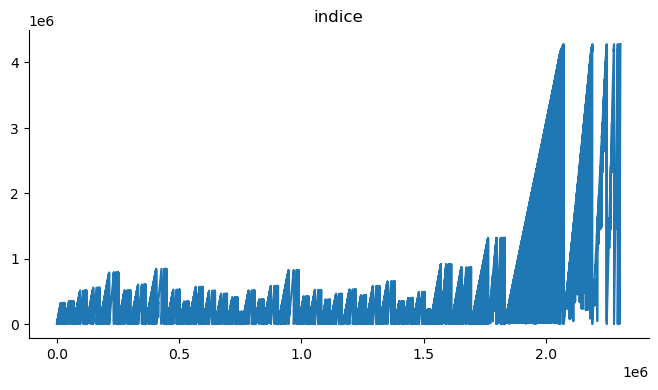

In [18]:
# @title indice

from matplotlib import pyplot as plt
df['indice'].plot(kind='line', figsize=(8, 4), title='indice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
import torch
if not torch.cuda.is_available():
    print("CUDA is not available. Please ensure you have a compatible GPU and drivers installed.")
else:
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")

Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU


In [6]:
from transformers import AutoModelForCausalLM

# Recarrega o modelo salvo
model = AutoModelForCausalLM.from_pretrained('./Llama-3.2-3b-Gather/').to('cpu')

# Verifica a estrutura do modelo recarregado
print(model)

Some weights of LlamaForCausalLM were not initialized from the model checkpoint at ./Llama-3.2-3b-Gather/ and are newly initialized: ['model.norm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 3072)
    (layers): ModuleList()
    (norm): LlamaRMSNorm((3072,), eps=1e-05)
    (rotary_emb): LlamaRotaryEmbedding()
  )
  (lm_head): Linear(in_features=3072, out_features=128256, bias=False)
)


In [7]:
def text_to_embedding(input_text):
    with torch.no_grad():
        input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to('cpu')
        embedding = model.model.embed_tokens(input_ids)
        embedding = embedding.cpu()  # Move para CPU
    return embedding[0]

In [11]:
for index, row in tqdm(df.iterrows(), total=len(df)):

	vetor = text_to_embedding(row['content'])
	dim1 = vetor.shape[0]
	dim2 = vetor.shape[1]
	vetor = vetor.flatten().cpu().detach().numpy()

	try:
		conn.execute('INSERT INTO embedding (indice,data,dim1,dim2) VALUES (?,?,?,?)', (row['indice'],vetor,dim1,dim2))
	except Exception as e:
		print(f"Erro ao inserir dados no DuckDB: {e}")

  0%|          | 31/51331 [06:33<181:05:11, 12.71s/it]


KeyboardInterrupt: 

In [ ]:
from itertools import permutations
# Muito grande
#list(permutations(conn.execute("""SELECT indice FROM dataset;""").fetchnumpy()['indice']))

In [8]:
import time
import logging
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

#logging.basicConfig(level=logging.INFO)
#logger = logging.getLogger(__name__)

class SequenceDataset(Dataset):
    def __init__(self, df):
        self.df = df.reset_index(drop=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        #start_time = time.time()
        
        row = self.df.iloc[idx]
        sequence1 = text_to_embedding(row['content1'])
        sequence2 = text_to_embedding(row['content2'])
        index_difference = row['indice1'] - row['indice2']
        
        sequence1 = torch.tensor(sequence1, dtype=torch.float32)
        sequence2 = torch.tensor(sequence2, dtype=torch.float32)
        target = torch.tensor(index_difference, dtype=torch.float32)
        
        #end_time = time.time()
        #if idx % 1000 == 0:
        #    logger.info(f"Processando amostra {idx}/{len(self.df)} - Tempo: {end_time - start_time:.4f}s")
        
        return sequence1, sequence2, target

In [17]:
df = conn.execute("""
WITH random_indices AS (
  SELECT indice, content
  FROM dataset
  ORDER BY RANDOM()
  LIMIT 51331
)
SELECT
  a.indice AS indice1,
  b.indice AS indice2,
  a.content AS content1,
  b.content AS content2
FROM random_indices a
JOIN random_indices b
  ON a.indice < b.indice AND b.indice - a.indice <= 1024  -- Limita a diferença entre os índices a 1024
ORDER BY RANDOM()
LIMIT 41065;
""").df()

df

,indice1,indice2,content1,content2
0,1227908,1228310,deus ensinava leopold von ranke a inteligência...,neutralizado por um concomitante progresso da ...
1,823443,823669,fundador anda hoje nas bocas dos nossos acadêm...,os homens a seu serviço uma imensa cenoura de ...
2,343568,343752,sentido vários movimentos políticomilitares de...,pacíficos e de natureza puramente intelectual ...
3,54577,55173,global ver o texto até que enfim no capítulo r...,mil vezes a pergunta você faz isso por dinheir...
4,11503,12252,educação é uma conquista pessoal educação ensi...,desejo se o ambiente visual urbano torna o ess...
...,...,...,...,...
41060,743230,743311,não é essa a essência do ideal socialista que ...,coletivo diário do comércio 30 de outubro de 2...
41061,275676,276186,camuflagem de transmutações lentas e aparentem...,curso de implantação um projeto de transformaç...
41062,679938,680156,do discurso político enragé engrossando pela r...,tradição de apolitheia toda uma nobre linhagem...
41063,761121,762004,um bocado de atraso allen hill um consultor de...,paulo querem lhe infundir mais medo ainda é um...


In [18]:
from torch.utils.data import random_split

# Função para o collate_fn, necessária para lidar com sequências de tamanhos variáveis
def collate_fn(batch):
    sequences1, sequences2, targets = zip(*batch)
    return sequences1, sequences2, torch.tensor(targets, dtype=torch.float32)

dataset = SequenceDataset(df)

# Dividir o dataset
dataset_size = len(dataset)
validation_split = 0.2
validation_size = int(validation_split * dataset_size)
training_size = dataset_size - validation_size

training_dataset, validation_dataset = random_split(dataset, [training_size, validation_size])

# Criar DataLoaders
train_dataloader = DataLoader(
    training_dataset, 
    batch_size=32, 
    shuffle=True, 
    num_workers=0, 
    pin_memory=True, 
    collate_fn=collate_fn
)

validation_dataloader = DataLoader(
    validation_dataset, 
    batch_size=32, 
    shuffle=False, 
    num_workers=0, 
    pin_memory=True, 
    collate_fn=collate_fn
)

In [ ]:
import torch
import torch.nn as nn

class RegressionRNN(nn.Module):
    def __init__(self, input_size=3072, hidden_size=1024, num_layers=1):
        super(RegressionRNN, self).__init__()
        self.rnn1 = nn.LSTM(input_size=input_size, 
                            hidden_size=hidden_size, 
                            num_layers=num_layers, 
                            batch_first=True)
        self.rnn2 = nn.LSTM(input_size=input_size, 
                            hidden_size=hidden_size, 
                            num_layers=num_layers, 
                            batch_first=True)train
        self.fc = nn.Linear(hidden_size * 2, 1)
        
    def forward(self, sequences1, sequences2):
        # Determina o dispositivo a partir do primeiro tensor da primeira sequência
        device = sequences1[0].device
        
        # Processa a primeira sequência
        lengths1 = torch.tensor([seq.size(0) for seq in sequences1], dtype=torch.long, device=device)
        padded_sequences1 = nn.utils.rnn.pad_sequence(sequences1, batch_first=True)
        #packed_input1 = nn.utils.rnn.pack_padded_sequence(padded_sequences1, lengths1.cpu(), batch_first=True, enforce_sorted=False)
        packed_input1 = nn.utils.rnn.pack_padded_sequence(padded_sequences1, lengths1, batch_first=True, enforce_sorted=False)


        packed_output1, (h_n1, c_n1) = self.rnn1(packed_input1)
        output1, _ = nn.utils.rnn.pad_packed_sequence(packed_output1, batch_first=True)
        batch_size1 = padded_sequences1.size(0)
        idx1 = (lengths1 - 1).view(-1, 1, 1).expand(batch_size1, 1, output1.size(2)).to(device)
        last_output1 = output1.gather(1, idx1).squeeze(1)
        
        # Processa a segunda sequência
        lengths2 = torch.tensor([seq.size(0) for seq in sequences2], dtype=torch.long, device=device)
        padded_sequences2 = nn.utils.rnn.pad_sequence(sequences2, batch_first=True)
        #packed_input2 = nn.utils.rnn.pack_padded_sequence(padded_sequences2, lengths2.cpu(), batch_first=True, enforce_sorted=False)
        packed_input2 = nn.utils.rnn.pack_padded_sequence(padded_sequences2, lengths2, batch_first=True, enforce_sorted=False)
        
        packed_output2, (h_n2, c_n2) = self.rnn2(packed_input2)
        output2, _ = nn.utils.rnn.pad_packed_sequence(packed_output2, batch_first=True)
        batch_size2 = padded_sequences2.size(0)
        idx2 = (lengths2 - 1).view(-1, 1, 1).expand(batch_size2, 1, output2.size(2)).to(device)
        last_output2 = output2.gather(1, idx2).squeeze(1)
        
        # Concatena as saídas das duas sequências
        combined_output = torch.cat((last_output1, last_output2), dim=1)
        
        # Passa pela camada totalmente conectada
        out = self.fc(combined_output)
        return out.squeeze(1)

In [21]:
# Inicializa o modelo, critério de perda e otimizador
model_order = RegressionRNN().to('cuda')
optimizer = torch.optim.Adam(model_order.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.MSELoss()  # Para regressão
num_epochs = 10

In [ ]:
import os

# Diretório onde os modelos serão salvos
save_dir = './saved_models'
os.makedirs(save_dir, exist_ok=True)

# Salvando o estado do modelo
model_path = os.path.join(save_dir, 'regression_rnn_model.pth')
torch.save(model_order.state_dict(), model_path)
print(f"Modelo salvo em {model_path}")

# Opcional: Salvando o estado do otimizador
optimizer_path = os.path.join(save_dir, 'optimizer_state.pth')
torch.save(optimizer.state_dict(), optimizer_path)
print(f"Estado do otimizador salvo em {optimizer_path}")

# Opcional: Salvar a época atual para retomar o treinamento
epoch_path = os.path.join(save_dir, 'last_epoch.pth')
torch.save({'epoch': epoch, 'model_state_dict': model_order.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_validation_loss}, epoch_path)
print(f"Checkpoint salvo em {epoch_path}")

Modelo salvo em ./saved_models/regression_rnn_model.pth
Estado do otimizador salvo em ./saved_models/optimizer_state.pth
Checkpoint salvo em ./saved_models/last_epoch.pth


In [ ]:
# Carregar o estado do modelo
model_order.load_state_dict(torch.load(model_path))
model_order.eval()  # Coloca o modelo em modo de avaliação (opcional)

# Carregar o estado do otimizador (se você também salvou)
optimizer.load_state_dict(torch.load(optimizer_path))

# Opcional: Carregar o checkpoint completo
checkpoint = torch.load(epoch_path)
model_order.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch'] + 1
loss = checkpoint['loss']

print(f"Checkpoint carregado. Iniciando a partir da época {start_epoch} com perda {loss}")

In [14]:
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

# Inicializar o writer do TensorBoard
writer = SummaryWriter('runs/treinamento_regressao_rnn')

# Inicializar o contador de passos
step = 0

# Envolver o loop de épocas com tqdm para mostrar o progresso das épocas
epoch_progress = tqdm(range(num_epochs), desc='Treinamento', unit='época')

for epoch in epoch_progress:
    # Atualizar a descrição da barra de progresso com a época atual
    epoch_progress.set_description(f'Época {epoch+1}/{num_epochs}')
    
    # Treinamento
    model_order.train()
    train_loss = 0.0

    for sequences1_batch, sequences2_batch, targets_batch in train_dataloader:
        optimizer.zero_grad()
        
        # Transferir dados para GPU
        sequences1_batch = [seq.to('cuda') for seq in sequences1_batch]
        sequences2_batch = [seq.to('cuda') for seq in sequences2_batch]
        targets_batch = targets_batch.to('cuda')
        
        # Forward pass
        outputs = model_order(sequences1_batch, sequences2_batch)
        loss = criterion(outputs, targets_batch)
        
        # Backward pass e otimização
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        
        # Registrar a perda de treinamento a cada passo
        writer.add_scalar('Perda_Treinamento_Passo', loss.item(), step)
        step += 1
    
    avg_train_loss = train_loss / len(train_dataloader)
    
    # Validação
    model_order.eval()
    validation_loss = 0.0
    
    with torch.no_grad():
        for sequences1_batch, sequences2_batch, targets_batch in validation_dataloader:
            sequences1_batch = [seq.to('cuda') for seq in sequences1_batch]
            sequences2_batch = [seq.to('cuda') for seq in sequences2_batch]
            targets_batch = targets_batch.to('cuda')
            
            outputs = model_order(sequences1_batch, sequences2_batch)
            loss = criterion(outputs, targets_batch)
            validation_loss += loss.item()
    
    avg_validation_loss = validation_loss / len(validation_dataloader)
    
    # Registrar as métricas de validação por época (opcional)
    writer.add_scalar('Perda_Validação_Epoca', avg_validation_loss, epoch+1)
    
    # Atualizar a descrição da barra com as perdas atuais
    epoch_progress.set_postfix({'Perda Treinamento': f'{avg_train_loss:.4f}', 
                                 'Perda Validação': f'{avg_validation_loss:.4f}'})
    
    # Exibir as métricas no console
    tqdm.write(f'Época {epoch+1}/{num_epochs}, Perda Treinamento: {avg_train_loss:.4f}, Perda Validação: {avg_validation_loss:.4f}')

# Fechar o SummaryWriter ao final do treinamento
writer.close()

Época 1/10:   0%|          | 0/10 [00:00<?, ?época/s] /tmp/ipykernel_6464/2554487884.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sequence1 = torch.tensor(sequence1, dtype=torch.float32)
/tmp/ipykernel_6464/2554487884.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sequence2 = torch.tensor(sequence2, dtype=torch.float32)
Época 2/10:  10%|█         | 1/10 [05:42<51:22, 342.51s/época, Perda Treinamento=265980485287.4766, Perda Validação=262622917651.0807]

Época 1/10, Perda Treinamento: 265980485287.4766, Perda Validação: 262622917651.0807


Época 3/10:  20%|██        | 2/10 [11:13<44:46, 335.84s/época, Perda Treinamento=264989807153.4455, Perda Validação=261629926915.1801]

Época 2/10, Perda Treinamento: 264989807153.4455, Perda Validação: 261629926915.1801


Época 4/10:  30%|███       | 3/10 [17:36<41:41, 357.35s/época, Perda Treinamento=263884734668.1620, Perda Validação=260635874017.7888]

Época 3/10, Perda Treinamento: 263884734668.1620, Perda Validação: 260635874017.7888


Época 5/10:  40%|████      | 4/10 [23:03<34:32, 345.36s/época, Perda Treinamento=262966049182.7040, Perda Validação=259641621103.3044]

Época 4/10, Perda Treinamento: 262966049182.7040, Perda Validação: 259641621103.3044


Época 5/10:  40%|████      | 4/10 [27:57<41:56, 419.47s/época, Perda Treinamento=262966049182.7040, Perda Validação=259641621103.3044]


KeyboardInterrupt: 

In [15]:
# Fechar a conexão com o banco de dados
conn.close()